# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

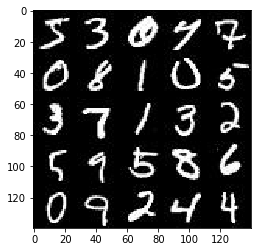

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

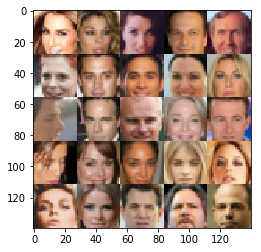

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/edo/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, None, name='learning_rate')
    
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
alpha=0.2
def discriminator(images, reuse=False):

    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        #x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        #bn3 = tf.layers.batch_normalization(x3, training=True)
        #relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        #flat = tf.reshape(relu3, (-1, 4*4*256))
        flat = tf.reshape(relu2, (-1, 7*7*128))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
alpha=0.2
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        #x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        #x1 = tf.reshape(x1, (-1, 7, 7, 512))
        # 7x7x512 now
        
        x1 = tf.layers.dense(z, 7*7*128)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 128))
        # 7x7x128 now
        
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)

        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x256 now

        #x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        #x3 = tf.layers.batch_normalization(x3, training=is_train)
        #x3 = tf.maximum(alpha * x3, x3)
        # 16x16x128 now
                
        # Output layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        # 28x28xOUT now
        
        out = tf.tanh(logits)
        
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
smooth = 0.1
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
                  tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                          labels=tf.ones_like(d_logits_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
                  tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                          labels=tf.zeros_like(d_logits_real)))
    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(
             tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                     labels=tf.ones_like(d_logits_fake)))

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [24]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_images = batch_images * 2
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % 5 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % 100 == 0:
                    show_generator_output(sess, 6, input_z, data_shape[3], data_image_mode)
        
        # At the end of each epoch, get the losses and print them out
        train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
        train_loss_g = g_loss.eval({input_z: batch_z})
        show_generator_output(sess, 6, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

data_shape (60000, 28, 28, 1)
input_real.shape (?, 28, 28, 1)
Epoch 1/2... Discriminator Loss: 1.3742... Generator Loss: 0.5319
Epoch 1/2... Discriminator Loss: 0.8673... Generator Loss: 1.1324
Epoch 1/2... Discriminator Loss: 0.7675... Generator Loss: 1.3817
Epoch 1/2... Discriminator Loss: 0.9882... Generator Loss: 1.0705
Epoch 1/2... Discriminator Loss: 1.1363... Generator Loss: 0.9126
Epoch 1/2... Discriminator Loss: 1.0270... Generator Loss: 1.1009
Epoch 1/2... Discriminator Loss: 1.2652... Generator Loss: 0.9333
Epoch 1/2... Discriminator Loss: 1.4698... Generator Loss: 0.7913
Epoch 1/2... Discriminator Loss: 1.1446... Generator Loss: 0.9561
Epoch 1/2... Discriminator Loss: 1.1503... Generator Loss: 0.6923
Epoch 1/2... Discriminator Loss: 1.1646... Generator Loss: 0.8203
Epoch 1/2... Discriminator Loss: 1.1511... Generator Loss: 0.9426
Epoch 1/2... Discriminator Loss: 1.1484... Generator Loss: 0.7441
Epoch 1/2... Discriminator Loss: 1.1714... Generator Loss: 1.4236
Epoch 1/2... D

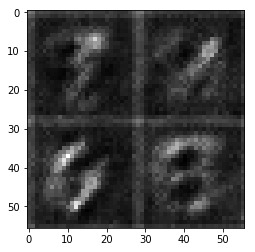

Epoch 1/2... Discriminator Loss: 1.0353... Generator Loss: 1.0388
Epoch 1/2... Discriminator Loss: 1.3290... Generator Loss: 1.4978
Epoch 1/2... Discriminator Loss: 1.1840... Generator Loss: 1.0587
Epoch 1/2... Discriminator Loss: 1.2347... Generator Loss: 0.8218
Epoch 1/2... Discriminator Loss: 1.2910... Generator Loss: 1.2871
Epoch 1/2... Discriminator Loss: 1.2091... Generator Loss: 0.9070
Epoch 1/2... Discriminator Loss: 1.0936... Generator Loss: 0.9824
Epoch 1/2... Discriminator Loss: 1.2148... Generator Loss: 0.7922
Epoch 1/2... Discriminator Loss: 1.2213... Generator Loss: 0.9121
Epoch 1/2... Discriminator Loss: 1.1839... Generator Loss: 0.8365
Epoch 1/2... Discriminator Loss: 1.2595... Generator Loss: 1.0351
Epoch 1/2... Discriminator Loss: 1.2785... Generator Loss: 0.7168
Epoch 1/2... Discriminator Loss: 1.2322... Generator Loss: 1.1029
Epoch 1/2... Discriminator Loss: 1.1091... Generator Loss: 0.9834
Epoch 1/2... Discriminator Loss: 1.1778... Generator Loss: 0.8757
Epoch 1/2.

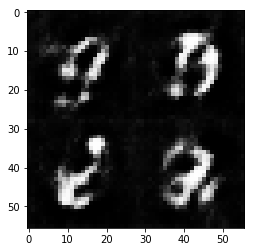

Epoch 1/2... Discriminator Loss: 1.1011... Generator Loss: 0.8873
Epoch 1/2... Discriminator Loss: 1.0758... Generator Loss: 1.1026
Epoch 1/2... Discriminator Loss: 1.1235... Generator Loss: 1.0001
Epoch 1/2... Discriminator Loss: 1.1452... Generator Loss: 0.7987
Epoch 1/2... Discriminator Loss: 1.1221... Generator Loss: 1.2716
Epoch 1/2... Discriminator Loss: 1.1577... Generator Loss: 0.7912
Epoch 1/2... Discriminator Loss: 1.2098... Generator Loss: 1.1811
Epoch 1/2... Discriminator Loss: 1.0455... Generator Loss: 1.2131
Epoch 1/2... Discriminator Loss: 1.2397... Generator Loss: 0.6681
Epoch 1/2... Discriminator Loss: 1.0989... Generator Loss: 1.3924
Epoch 1/2... Discriminator Loss: 1.1672... Generator Loss: 0.8903
Epoch 1/2... Discriminator Loss: 1.2150... Generator Loss: 1.5543
Epoch 1/2... Discriminator Loss: 1.1521... Generator Loss: 0.8662
Epoch 1/2... Discriminator Loss: 0.9255... Generator Loss: 1.3637
Epoch 1/2... Discriminator Loss: 1.2350... Generator Loss: 1.2521
Epoch 1/2.

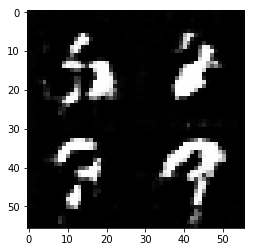

Epoch 1/2... Discriminator Loss: 1.0006... Generator Loss: 1.1288
Epoch 1/2... Discriminator Loss: 0.9488... Generator Loss: 1.0158
Epoch 1/2... Discriminator Loss: 1.0238... Generator Loss: 0.9506
Epoch 1/2... Discriminator Loss: 0.9053... Generator Loss: 1.2728
Epoch 1/2... Discriminator Loss: 1.0389... Generator Loss: 1.3687
Epoch 1/2... Discriminator Loss: 1.0305... Generator Loss: 1.3819
Epoch 1/2... Discriminator Loss: 1.0015... Generator Loss: 1.0681
Epoch 1/2... Discriminator Loss: 1.0417... Generator Loss: 1.3282
Epoch 1/2... Discriminator Loss: 0.9569... Generator Loss: 1.1583
Epoch 1/2... Discriminator Loss: 0.9708... Generator Loss: 1.5234
Epoch 1/2... Discriminator Loss: 1.0326... Generator Loss: 1.3149
Epoch 1/2... Discriminator Loss: 1.0206... Generator Loss: 0.8519
Epoch 1/2... Discriminator Loss: 0.9294... Generator Loss: 1.0910
Epoch 1/2... Discriminator Loss: 0.8910... Generator Loss: 1.7121
Epoch 1/2... Discriminator Loss: 0.9223... Generator Loss: 1.1730
Epoch 1/2.

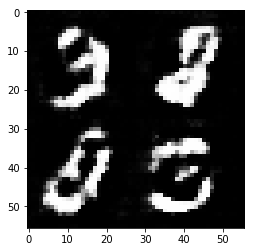

Epoch 1/2... Discriminator Loss: 0.8912... Generator Loss: 1.0406
Epoch 1/2... Discriminator Loss: 0.9340... Generator Loss: 1.5905
Epoch 1/2... Discriminator Loss: 0.8823... Generator Loss: 1.2830
Epoch 1/2... Discriminator Loss: 1.1053... Generator Loss: 0.6988
Epoch 1/2... Discriminator Loss: 0.8504... Generator Loss: 1.1816
Epoch 1/2... Discriminator Loss: 0.9237... Generator Loss: 1.4077
Epoch 1/2... Discriminator Loss: 1.2376... Generator Loss: 0.6300
Epoch 1/2... Discriminator Loss: 1.0003... Generator Loss: 0.8570
Epoch 1/2... Discriminator Loss: 0.9758... Generator Loss: 0.9387
Epoch 1/2... Discriminator Loss: 0.9070... Generator Loss: 1.6412
Epoch 1/2... Discriminator Loss: 0.9412... Generator Loss: 1.3688
Epoch 1/2... Discriminator Loss: 0.8352... Generator Loss: 1.6919
Epoch 1/2... Discriminator Loss: 0.9186... Generator Loss: 1.1798
Epoch 2/2... Discriminator Loss: 0.9513... Generator Loss: 1.3378
Epoch 2/2... Discriminator Loss: 0.9270... Generator Loss: 1.0680
Epoch 2/2.

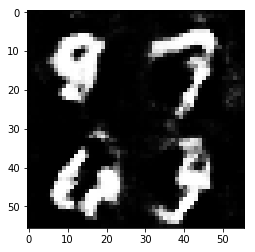

Epoch 2/2... Discriminator Loss: 1.0008... Generator Loss: 1.6174
Epoch 2/2... Discriminator Loss: 0.7955... Generator Loss: 1.6200
Epoch 2/2... Discriminator Loss: 0.8706... Generator Loss: 1.1227
Epoch 2/2... Discriminator Loss: 1.0062... Generator Loss: 0.8925
Epoch 2/2... Discriminator Loss: 0.8285... Generator Loss: 1.5667
Epoch 2/2... Discriminator Loss: 0.8245... Generator Loss: 1.4896
Epoch 2/2... Discriminator Loss: 0.9187... Generator Loss: 1.4844
Epoch 2/2... Discriminator Loss: 0.9285... Generator Loss: 1.0163
Epoch 2/2... Discriminator Loss: 0.8571... Generator Loss: 1.3970
Epoch 2/2... Discriminator Loss: 1.1518... Generator Loss: 2.2286
Epoch 2/2... Discriminator Loss: 0.8084... Generator Loss: 2.1623
Epoch 2/2... Discriminator Loss: 0.9280... Generator Loss: 1.1850
Epoch 2/2... Discriminator Loss: 0.8757... Generator Loss: 1.3025
Epoch 2/2... Discriminator Loss: 0.8438... Generator Loss: 1.2596
Epoch 2/2... Discriminator Loss: 1.0961... Generator Loss: 0.7841
Epoch 2/2.

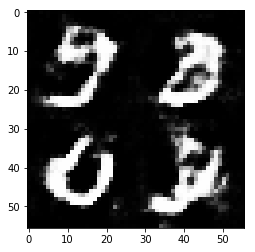

Epoch 2/2... Discriminator Loss: 0.8816... Generator Loss: 1.6764
Epoch 2/2... Discriminator Loss: 1.0202... Generator Loss: 1.1188
Epoch 2/2... Discriminator Loss: 1.1599... Generator Loss: 1.6977
Epoch 2/2... Discriminator Loss: 0.8420... Generator Loss: 1.2296
Epoch 2/2... Discriminator Loss: 1.0577... Generator Loss: 1.2206
Epoch 2/2... Discriminator Loss: 1.1352... Generator Loss: 0.7931
Epoch 2/2... Discriminator Loss: 0.9647... Generator Loss: 1.1912
Epoch 2/2... Discriminator Loss: 0.9905... Generator Loss: 0.9004
Epoch 2/2... Discriminator Loss: 0.9939... Generator Loss: 1.1448
Epoch 2/2... Discriminator Loss: 0.9385... Generator Loss: 1.0642
Epoch 2/2... Discriminator Loss: 0.9630... Generator Loss: 1.3573
Epoch 2/2... Discriminator Loss: 1.1029... Generator Loss: 0.9522
Epoch 2/2... Discriminator Loss: 1.0651... Generator Loss: 0.8502
Epoch 2/2... Discriminator Loss: 1.0347... Generator Loss: 1.1414
Epoch 2/2... Discriminator Loss: 1.2518... Generator Loss: 0.6161
Epoch 2/2.

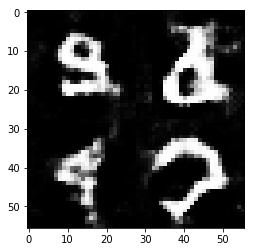

Epoch 2/2... Discriminator Loss: 1.2575... Generator Loss: 1.8601
Epoch 2/2... Discriminator Loss: 1.0522... Generator Loss: 1.0305
Epoch 2/2... Discriminator Loss: 1.0154... Generator Loss: 0.9963
Epoch 2/2... Discriminator Loss: 0.9494... Generator Loss: 1.1954
Epoch 2/2... Discriminator Loss: 1.0531... Generator Loss: 0.9333
Epoch 2/2... Discriminator Loss: 1.0821... Generator Loss: 0.9743
Epoch 2/2... Discriminator Loss: 1.0676... Generator Loss: 0.9452
Epoch 2/2... Discriminator Loss: 1.0245... Generator Loss: 1.3262
Epoch 2/2... Discriminator Loss: 1.1602... Generator Loss: 1.4223
Epoch 2/2... Discriminator Loss: 0.9930... Generator Loss: 1.1632
Epoch 2/2... Discriminator Loss: 1.1136... Generator Loss: 0.8176
Epoch 2/2... Discriminator Loss: 1.0176... Generator Loss: 1.1406
Epoch 2/2... Discriminator Loss: 0.9529... Generator Loss: 1.1235
Epoch 2/2... Discriminator Loss: 1.0460... Generator Loss: 0.9583
Epoch 2/2... Discriminator Loss: 0.9123... Generator Loss: 1.3206
Epoch 2/2.

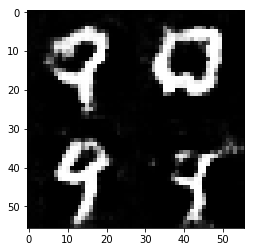

Epoch 2/2... Discriminator Loss: 1.1408... Generator Loss: 0.7709
Epoch 2/2... Discriminator Loss: 1.1432... Generator Loss: 0.8926
Epoch 2/2... Discriminator Loss: 1.0794... Generator Loss: 0.8258
Epoch 2/2... Discriminator Loss: 1.0278... Generator Loss: 1.1181
Epoch 2/2... Discriminator Loss: 1.0885... Generator Loss: 0.8353
Epoch 2/2... Discriminator Loss: 1.0432... Generator Loss: 0.9448
Epoch 2/2... Discriminator Loss: 1.1514... Generator Loss: 0.8167
Epoch 2/2... Discriminator Loss: 1.0649... Generator Loss: 1.1192
Epoch 2/2... Discriminator Loss: 0.9518... Generator Loss: 1.4792
Epoch 2/2... Discriminator Loss: 1.1541... Generator Loss: 0.7629
Epoch 2/2... Discriminator Loss: 1.0449... Generator Loss: 1.2920
Epoch 2/2... Discriminator Loss: 1.1698... Generator Loss: 0.6960
Epoch 2/2... Discriminator Loss: 1.2226... Generator Loss: 1.4141
Epoch 2/2... Discriminator Loss: 1.0980... Generator Loss: 1.2841
Epoch 2/2... Discriminator Loss: 1.0656... Generator Loss: 0.9656
Epoch 2/2.

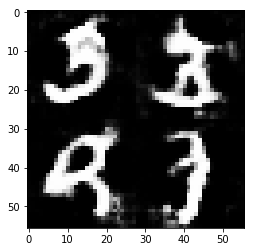

Epoch 2/2... Discriminator Loss: 1.1589... Generator Loss: 0.7687
Epoch 2/2... Discriminator Loss: 1.2514... Generator Loss: 0.7107
Epoch 2/2... Discriminator Loss: 1.0377... Generator Loss: 1.1432
Epoch 2/2... Discriminator Loss: 1.1083... Generator Loss: 1.1108
Epoch 2/2... Discriminator Loss: 1.0822... Generator Loss: 1.1068
Epoch 2/2... Discriminator Loss: 0.9706... Generator Loss: 1.3335
Epoch 2/2... Discriminator Loss: 1.0066... Generator Loss: 1.0620


In [23]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.1415... Generator Loss: 0.2452
Epoch 1/1... Discriminator Loss: 1.8311... Generator Loss: 0.4020
Epoch 1/1... Discriminator Loss: 1.7646... Generator Loss: 0.4411
Epoch 1/1... Discriminator Loss: 1.6019... Generator Loss: 0.6151
Epoch 1/1... Discriminator Loss: 1.5717... Generator Loss: 0.7336
Epoch 1/1... Discriminator Loss: 1.3983... Generator Loss: 0.8074
Epoch 1/1... Discriminator Loss: 1.2280... Generator Loss: 0.9874
Epoch 1/1... Discriminator Loss: 1.1746... Generator Loss: 1.0957
Epoch 1/1... Discriminator Loss: 1.2239... Generator Loss: 1.0898
Epoch 1/1... Discriminator Loss: 1.1220... Generator Loss: 1.1498
Epoch 1/1... Discriminator Loss: 1.1355... Generator Loss: 1.2463
Epoch 1/1... Discriminator Loss: 1.2326... Generator Loss: 1.1873
Epoch 1/1... Discriminator Loss: 1.3007... Generator Loss: 1.0773
Epoch 1/1... Discriminator Loss: 1.4028... Generator Loss: 0.6319
Epoch 1/1... Discriminator Loss: 1.3509... Generator Loss: 0.8870
Epoch 1/1.

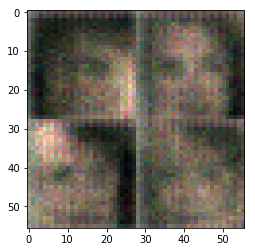

Epoch 1/1... Discriminator Loss: 1.2182... Generator Loss: 0.9673
Epoch 1/1... Discriminator Loss: 1.1566... Generator Loss: 1.7127
Epoch 1/1... Discriminator Loss: 1.3702... Generator Loss: 0.7031
Epoch 1/1... Discriminator Loss: 1.1229... Generator Loss: 1.4071
Epoch 1/1... Discriminator Loss: 1.2481... Generator Loss: 0.8980
Epoch 1/1... Discriminator Loss: 1.3028... Generator Loss: 0.9324
Epoch 1/1... Discriminator Loss: 1.1084... Generator Loss: 1.1187
Epoch 1/1... Discriminator Loss: 1.2561... Generator Loss: 1.4225
Epoch 1/1... Discriminator Loss: 0.9940... Generator Loss: 1.1445
Epoch 1/1... Discriminator Loss: 1.2710... Generator Loss: 0.6952
Epoch 1/1... Discriminator Loss: 1.1130... Generator Loss: 0.9593
Epoch 1/1... Discriminator Loss: 1.2805... Generator Loss: 1.1709
Epoch 1/1... Discriminator Loss: 1.4072... Generator Loss: 0.5673
Epoch 1/1... Discriminator Loss: 1.1808... Generator Loss: 0.9421
Epoch 1/1... Discriminator Loss: 0.8630... Generator Loss: 1.9535
Epoch 1/1.

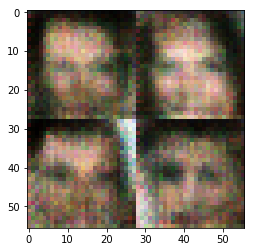

Epoch 1/1... Discriminator Loss: 0.8123... Generator Loss: 1.5008
Epoch 1/1... Discriminator Loss: 1.3580... Generator Loss: 0.5771
Epoch 1/1... Discriminator Loss: 1.1647... Generator Loss: 0.8477
Epoch 1/1... Discriminator Loss: 1.0203... Generator Loss: 1.2745
Epoch 1/1... Discriminator Loss: 1.5498... Generator Loss: 1.9638
Epoch 1/1... Discriminator Loss: 1.2673... Generator Loss: 1.0598
Epoch 1/1... Discriminator Loss: 1.2276... Generator Loss: 1.0175
Epoch 1/1... Discriminator Loss: 1.3122... Generator Loss: 2.2839
Epoch 1/1... Discriminator Loss: 1.2956... Generator Loss: 0.7793
Epoch 1/1... Discriminator Loss: 0.8603... Generator Loss: 1.2514
Epoch 1/1... Discriminator Loss: 0.9666... Generator Loss: 1.0311
Epoch 1/1... Discriminator Loss: 1.4113... Generator Loss: 0.6118
Epoch 1/1... Discriminator Loss: 0.9534... Generator Loss: 1.1368
Epoch 1/1... Discriminator Loss: 1.0679... Generator Loss: 0.8518
Epoch 1/1... Discriminator Loss: 1.1505... Generator Loss: 0.7314
Epoch 1/1.

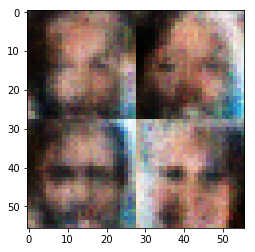

Epoch 1/1... Discriminator Loss: 0.6786... Generator Loss: 2.3708
Epoch 1/1... Discriminator Loss: 0.9727... Generator Loss: 0.9576
Epoch 1/1... Discriminator Loss: 1.2491... Generator Loss: 2.3173
Epoch 1/1... Discriminator Loss: 1.0365... Generator Loss: 1.3358
Epoch 1/1... Discriminator Loss: 0.9079... Generator Loss: 1.2740
Epoch 1/1... Discriminator Loss: 0.8113... Generator Loss: 1.6365
Epoch 1/1... Discriminator Loss: 0.7727... Generator Loss: 1.6905
Epoch 1/1... Discriminator Loss: 1.2597... Generator Loss: 0.9872
Epoch 1/1... Discriminator Loss: 0.8290... Generator Loss: 1.8821
Epoch 1/1... Discriminator Loss: 1.2986... Generator Loss: 0.5852
Epoch 1/1... Discriminator Loss: 1.3487... Generator Loss: 0.9654
Epoch 1/1... Discriminator Loss: 1.2016... Generator Loss: 0.7619
Epoch 1/1... Discriminator Loss: 0.7844... Generator Loss: 1.4720
Epoch 1/1... Discriminator Loss: 0.8574... Generator Loss: 2.3623
Epoch 1/1... Discriminator Loss: 0.9606... Generator Loss: 2.4856
Epoch 1/1.

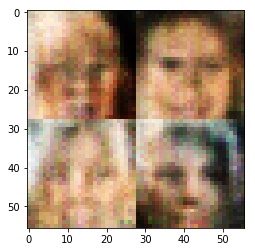

Epoch 1/1... Discriminator Loss: 0.6922... Generator Loss: 1.3927
Epoch 1/1... Discriminator Loss: 1.4027... Generator Loss: 1.5231
Epoch 1/1... Discriminator Loss: 1.3956... Generator Loss: 0.6384
Epoch 1/1... Discriminator Loss: 0.7073... Generator Loss: 2.5075
Epoch 1/1... Discriminator Loss: 1.1366... Generator Loss: 0.6744
Epoch 1/1... Discriminator Loss: 0.7744... Generator Loss: 1.3886
Epoch 1/1... Discriminator Loss: 1.1069... Generator Loss: 2.4728
Epoch 1/1... Discriminator Loss: 1.0136... Generator Loss: 0.8774
Epoch 1/1... Discriminator Loss: 1.1782... Generator Loss: 1.3286
Epoch 1/1... Discriminator Loss: 0.5008... Generator Loss: 2.8388
Epoch 1/1... Discriminator Loss: 1.1108... Generator Loss: 1.0252
Epoch 1/1... Discriminator Loss: 0.9631... Generator Loss: 0.9778
Epoch 1/1... Discriminator Loss: 0.7317... Generator Loss: 2.4553
Epoch 1/1... Discriminator Loss: 0.5601... Generator Loss: 2.1635
Epoch 1/1... Discriminator Loss: 1.0972... Generator Loss: 1.8040
Epoch 1/1.

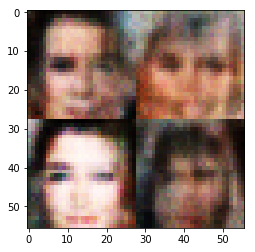

Epoch 1/1... Discriminator Loss: 0.8245... Generator Loss: 1.7912
Epoch 1/1... Discriminator Loss: 0.7167... Generator Loss: 1.7546
Epoch 1/1... Discriminator Loss: 0.7872... Generator Loss: 1.1505
Epoch 1/1... Discriminator Loss: 0.7255... Generator Loss: 2.6769
Epoch 1/1... Discriminator Loss: 0.6627... Generator Loss: 1.5054
Epoch 1/1... Discriminator Loss: 0.6737... Generator Loss: 1.8132
Epoch 1/1... Discriminator Loss: 1.2128... Generator Loss: 0.6654
Epoch 1/1... Discriminator Loss: 0.9844... Generator Loss: 2.8467
Epoch 1/1... Discriminator Loss: 1.7779... Generator Loss: 0.2867
Epoch 1/1... Discriminator Loss: 1.0416... Generator Loss: 1.7344
Epoch 1/1... Discriminator Loss: 1.2836... Generator Loss: 1.0074
Epoch 1/1... Discriminator Loss: 0.8665... Generator Loss: 2.3311
Epoch 1/1... Discriminator Loss: 0.9521... Generator Loss: 0.8767
Epoch 1/1... Discriminator Loss: 1.1173... Generator Loss: 2.8909
Epoch 1/1... Discriminator Loss: 0.9552... Generator Loss: 0.8427
Epoch 1/1.

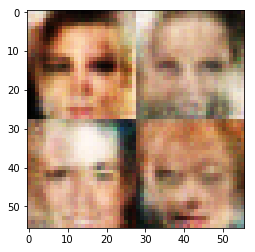

Epoch 1/1... Discriminator Loss: 0.5756... Generator Loss: 3.4519
Epoch 1/1... Discriminator Loss: 1.6341... Generator Loss: 1.4950
Epoch 1/1... Discriminator Loss: 1.2669... Generator Loss: 0.8545
Epoch 1/1... Discriminator Loss: 0.7951... Generator Loss: 2.0184
Epoch 1/1... Discriminator Loss: 0.8828... Generator Loss: 1.0376
Epoch 1/1... Discriminator Loss: 1.2785... Generator Loss: 0.8425
Epoch 1/1... Discriminator Loss: 0.7071... Generator Loss: 2.1845
Epoch 1/1... Discriminator Loss: 1.4026... Generator Loss: 0.4925
Epoch 1/1... Discriminator Loss: 1.3081... Generator Loss: 1.3134
Epoch 1/1... Discriminator Loss: 0.6784... Generator Loss: 2.4696
Epoch 1/1... Discriminator Loss: 1.4364... Generator Loss: 0.5084
Epoch 1/1... Discriminator Loss: 1.5407... Generator Loss: 1.1831
Epoch 1/1... Discriminator Loss: 1.2328... Generator Loss: 0.8659
Epoch 1/1... Discriminator Loss: 1.0170... Generator Loss: 1.1706
Epoch 1/1... Discriminator Loss: 0.8519... Generator Loss: 1.1456
Epoch 1/1.

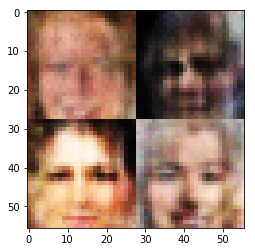

Epoch 1/1... Discriminator Loss: 0.8663... Generator Loss: 1.0188
Epoch 1/1... Discriminator Loss: 1.1142... Generator Loss: 0.8856
Epoch 1/1... Discriminator Loss: 0.8060... Generator Loss: 2.2915
Epoch 1/1... Discriminator Loss: 1.1567... Generator Loss: 0.7320
Epoch 1/1... Discriminator Loss: 0.9252... Generator Loss: 1.8859
Epoch 1/1... Discriminator Loss: 1.2935... Generator Loss: 0.5752
Epoch 1/1... Discriminator Loss: 0.9002... Generator Loss: 2.8212
Epoch 1/1... Discriminator Loss: 1.6918... Generator Loss: 0.3344
Epoch 1/1... Discriminator Loss: 1.1801... Generator Loss: 1.5660
Epoch 1/1... Discriminator Loss: 0.7947... Generator Loss: 1.8741
Epoch 1/1... Discriminator Loss: 0.9700... Generator Loss: 0.9920
Epoch 1/1... Discriminator Loss: 0.9696... Generator Loss: 2.8912
Epoch 1/1... Discriminator Loss: 1.0862... Generator Loss: 0.7458
Epoch 1/1... Discriminator Loss: 0.8596... Generator Loss: 1.7021
Epoch 1/1... Discriminator Loss: 1.0561... Generator Loss: 0.8000
Epoch 1/1.

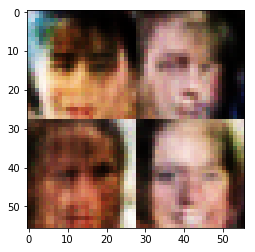

In [25]:
batch_size = 256
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.